In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

from ops import *
from base import *
from gradients import *

%load_ext autoreload
%autoreload 2

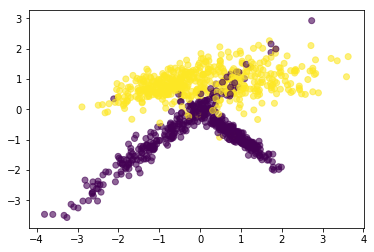

In [2]:
n, k = 1000, 2
X, y = make_classification(n_features=k, n_informative=2, n_redundant=0, n_samples=n, class_sep=0.8)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6);

In [3]:
d1, d2, d3 = 4, 3, 2
w1_value, b1_value = np.random.randn(k, d1), np.ones(d1)
w2_value, b2_value = np.random.randn(d1, d2), np.ones(d2)
w3_value, b3_value = np.random.randn(d2, d3), np.ones(d3)

In [4]:
x_ph = Placeholder()
y_ph = Placeholder()
w1 = Variable(w1_value, 'w1')
b1 = Variable(b1_value, 'b1')
w2 = Variable(w2_value, 'w2')
b2 = Variable(b2_value, 'b2')
w3 = Variable(w3_value, 'w3')
b3 = Variable(b3_value, 'b3')

In [5]:
x = add(matmul(x_ph, w1), b1)
x = relu(x)
x = add(matmul(x, w2), b2)
x = sigmoid(x)
scores = add(matmul(x, w3), b3)
probs = softmax(scores)

n_values = y.max() + 1
y_oh = np.eye(n_values)[y]

loss = neg(reduce_sum(multiply(y_ph, probs)))

In [6]:
n_epochs = 1000
optimizer = GradientDescentOptimizer()
feed_dict = {x_ph: X, y_ph: y_oh}
for i in range(n_epochs):
    optimizer.minimize(loss, feed_dict)
    if i % 100 == 0:
        y_pred = forward(probs, {x_ph: X})[:, 1]
        print(roc_auc_score(y, y_pred))

0.10644400000000001
0.974572
0.9781880000000001
0.98088
0.980876
0.9806279999999999
0.980124
0.979916
0.9794760000000001
0.9790479999999999


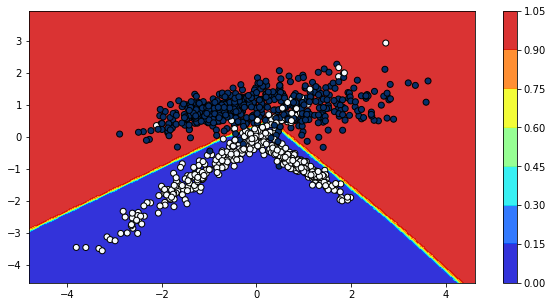

In [7]:
n_grid=100
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, n_grid)
yy = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, n_grid).T
xx, yy = np.meshgrid(xx, yy)
grid = np.c_[xx.ravel(), yy.ravel()]

probs_fitted = forward(probs, {x_ph: grid})
Z = probs_fitted[:, 1].reshape((n_grid, n_grid))

fig, ax = plt.subplots(figsize=(10, 5))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=plt.cm.Blues, edgecolor='k')
plt.colorbar(contour)